In [320]:
from standard_imports import *
from tqdm import tqdm

np.set_printoptions(precision=5, threshold=10,suppress=False, linewidth=1000)

In [321]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [322]:
d_vec = np.array([0,0,2])
ML = 6

In [323]:
data = np.load(file_location(d_vec, ML))

zeta_d = data["z_d_results"]
asymptotes = data["asymptotes"]
zeros = data["zeros"]
q_2 = data["q_2"]

In [324]:

q_derivatives = np.linspace(0,3, 200)


accurate_deriv = np.zeros_like(q_derivatives)
#numerical derivative of zeta

dx = np.diff(q_2)
dy_dx = np.diff(zeta_d)/dx

for i in tqdm(range(len(q_derivatives))):
    accurate_deriv[i] = derivative(1, d_vec, q_derivatives[i], 0.1, 2e4, ML,5e4 )


  0%|          | 0/200 [00:00<?, ?it/s]

/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/gab_large_cutoff.py:132: RuntimeWarning: divide by zero encountered in divide
  terms = np.exp(-alpha*D)/(D)**(a+1)*rho**(2*b)
/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/gab_large_cutoff.py:132: RuntimeWarning: divide by zero encountered in divide
  terms = np.exp(-alpha*D)/(D)**(a+1)*rho**(2*b)
/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/gab_large_cutoff.py:132: RuntimeWarning: invalid value encountered in multiply
  terms = np.exp(-alpha*D)/(D)**(a+1)*rho**(2*b)
100%|██████████| 200/200 [04:37<00:00,  1.39s/it]


(0.0, 3.0)

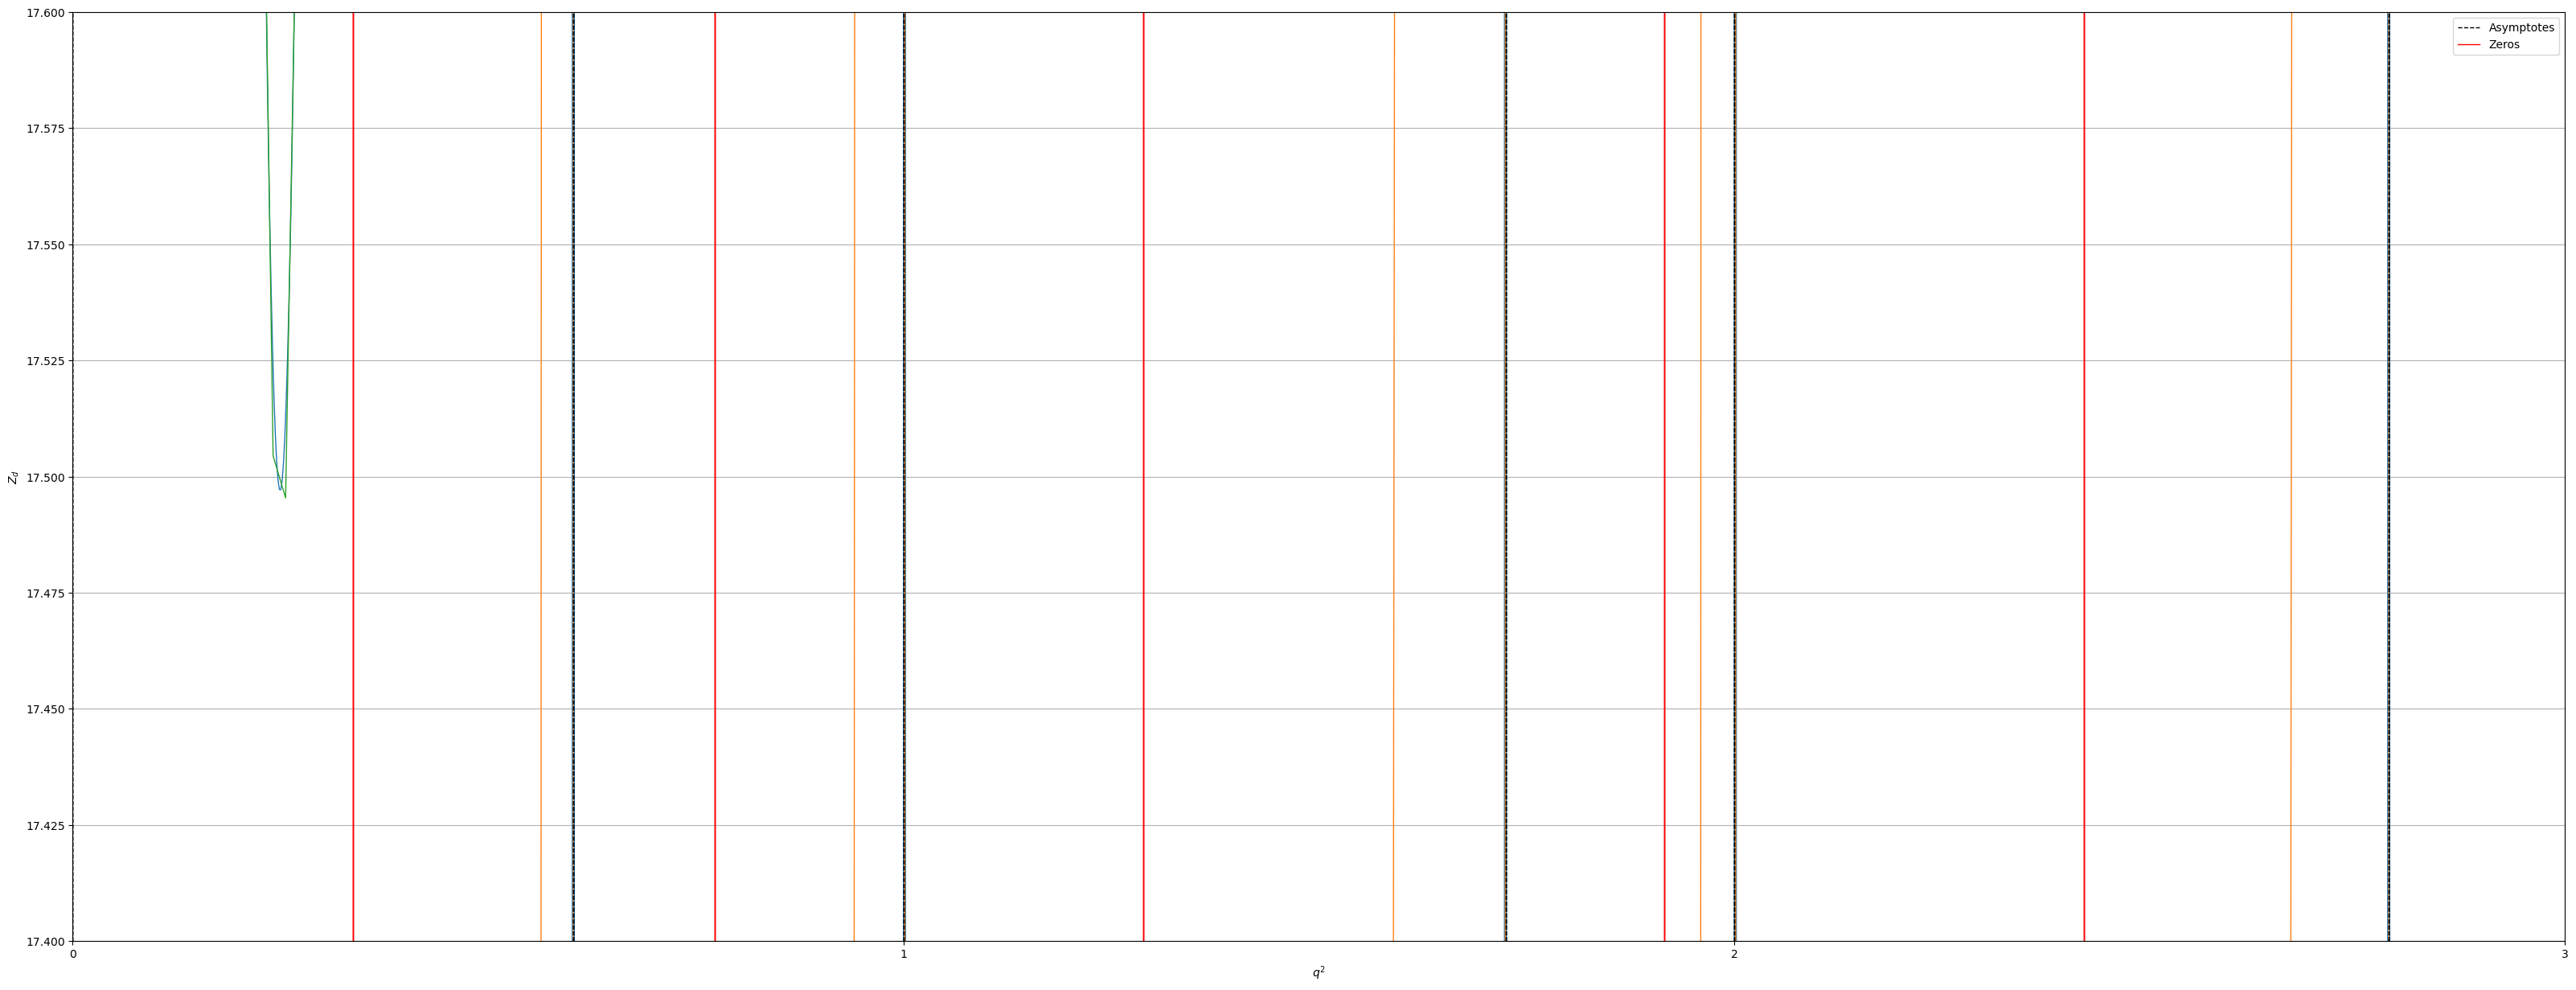

In [333]:
plt.figure(figsize = (40,15))
plot_nice(q_2[:-1] + dx/2, dy_dx, asymptotes, zeros, d_vec)

plot_nice(q_2, zeta_d, asymptotes, zeros, d_vec)

plot_nice(q_derivatives, accurate_deriv, asymptotes, zeros, d_vec)


plt.ylim(17.4,17.6)

plt.xlim(0,3)



In [334]:
print(accurate_deriv)
print(np.array(dy_dx))

[       nan 1250.12334  319.29254 ...   91.26574   82.29098   75.74701]
[       -inf 5.16383e+04 1.72187e+04 ... 1.38999e+05 4.16350e+05 2.96611e+15]


In [343]:

q_derivatives2 = np.copy(q_2[:-1] + dx/2)

#select every 10th point

q_derivatives2 = q_derivatives2[::20]



accurate_deriv2 = np.zeros_like(q_derivatives2)
#numerical derivative of zeta

dx = np.diff(q_2)
dy_dx = np.diff(zeta_d)/dx




for i in tqdm(range(len(q_derivatives2))):
    accurate_deriv2[i] = derivative(1, d_vec, q_derivatives2[i], 0.01, 4e4, ML, 1e5)


  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [11:26<00:00,  2.29s/it]


In [347]:
accurate_deriv2 

array([4.13045e+05, 2.54725e+02, 7.22587e+01, ..., 3.47976e+02, 7.01491e+02, 2.64066e+03])

(0.0, 9.884872406475145)

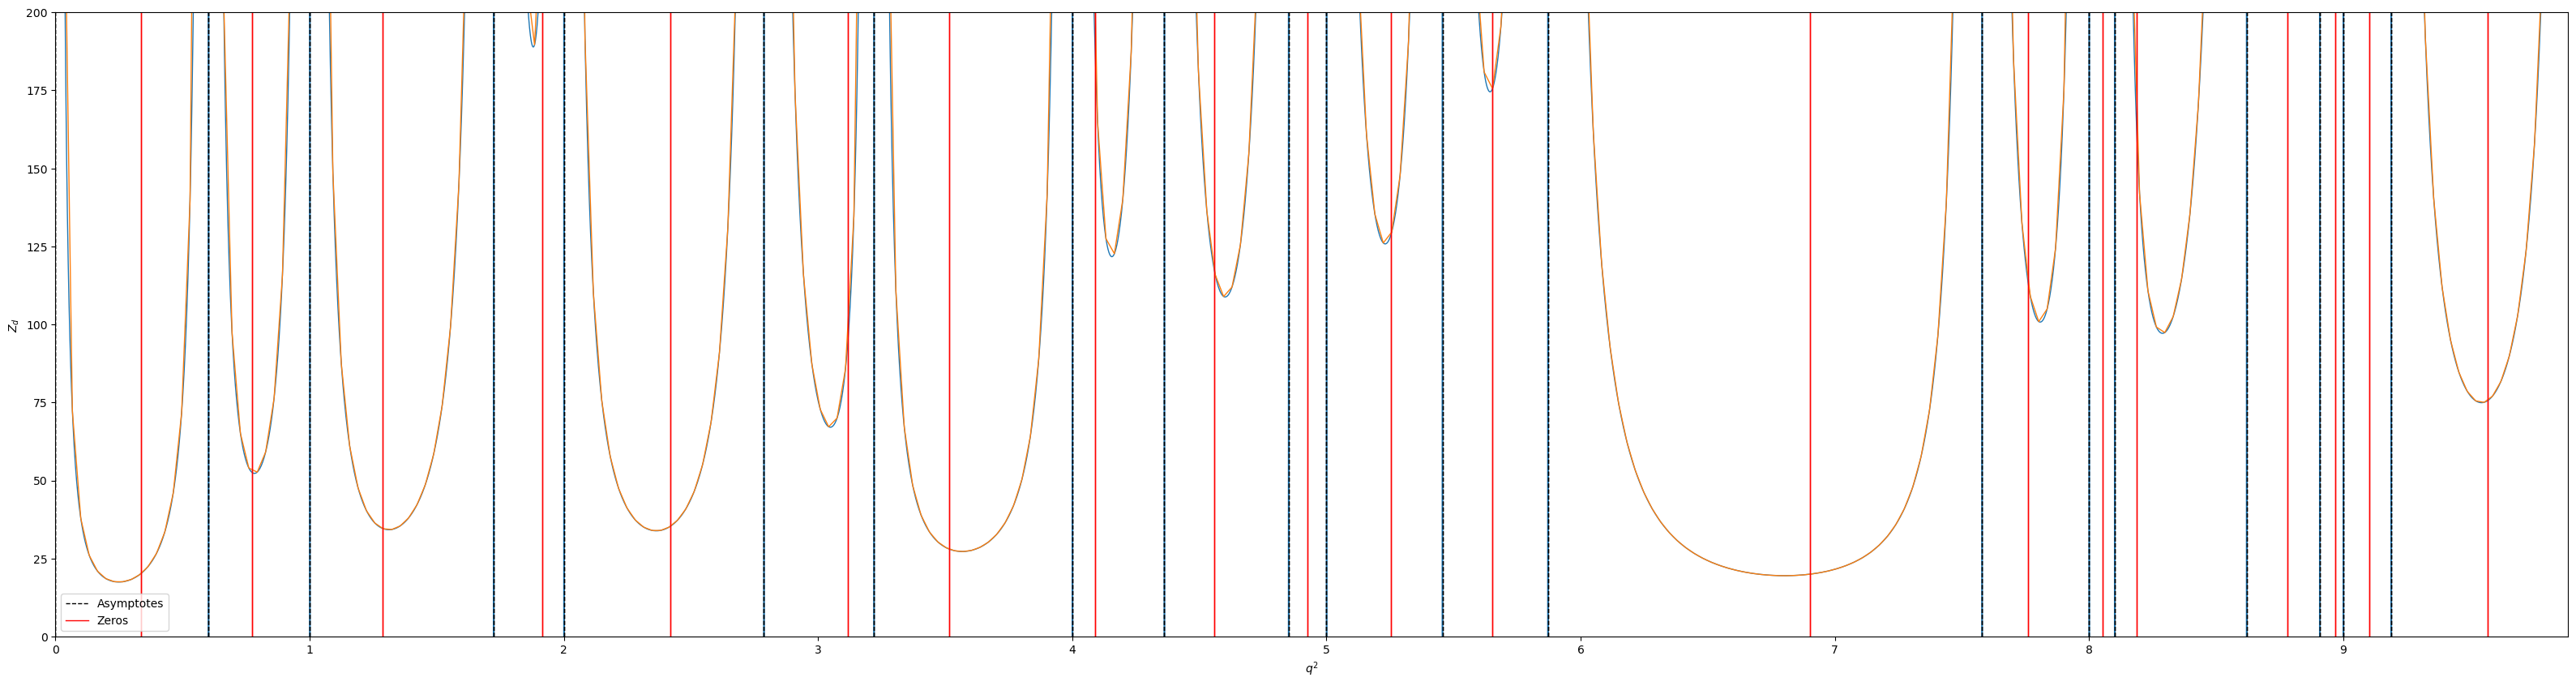

In [348]:
plt.figure(figsize = (40,10))
plot_nice(q_2[:-1] + dx/2, dy_dx, asymptotes, zeros, d_vec)

#plot_nice(q_2, zeta_d, asymptotes, zeros, d_vec)
plot_nice(q_derivatives2, accurate_deriv2, asymptotes, zeros, d_vec)

plt.ylim(0,200)

plt.xlim(0,q_derivatives2[-1])




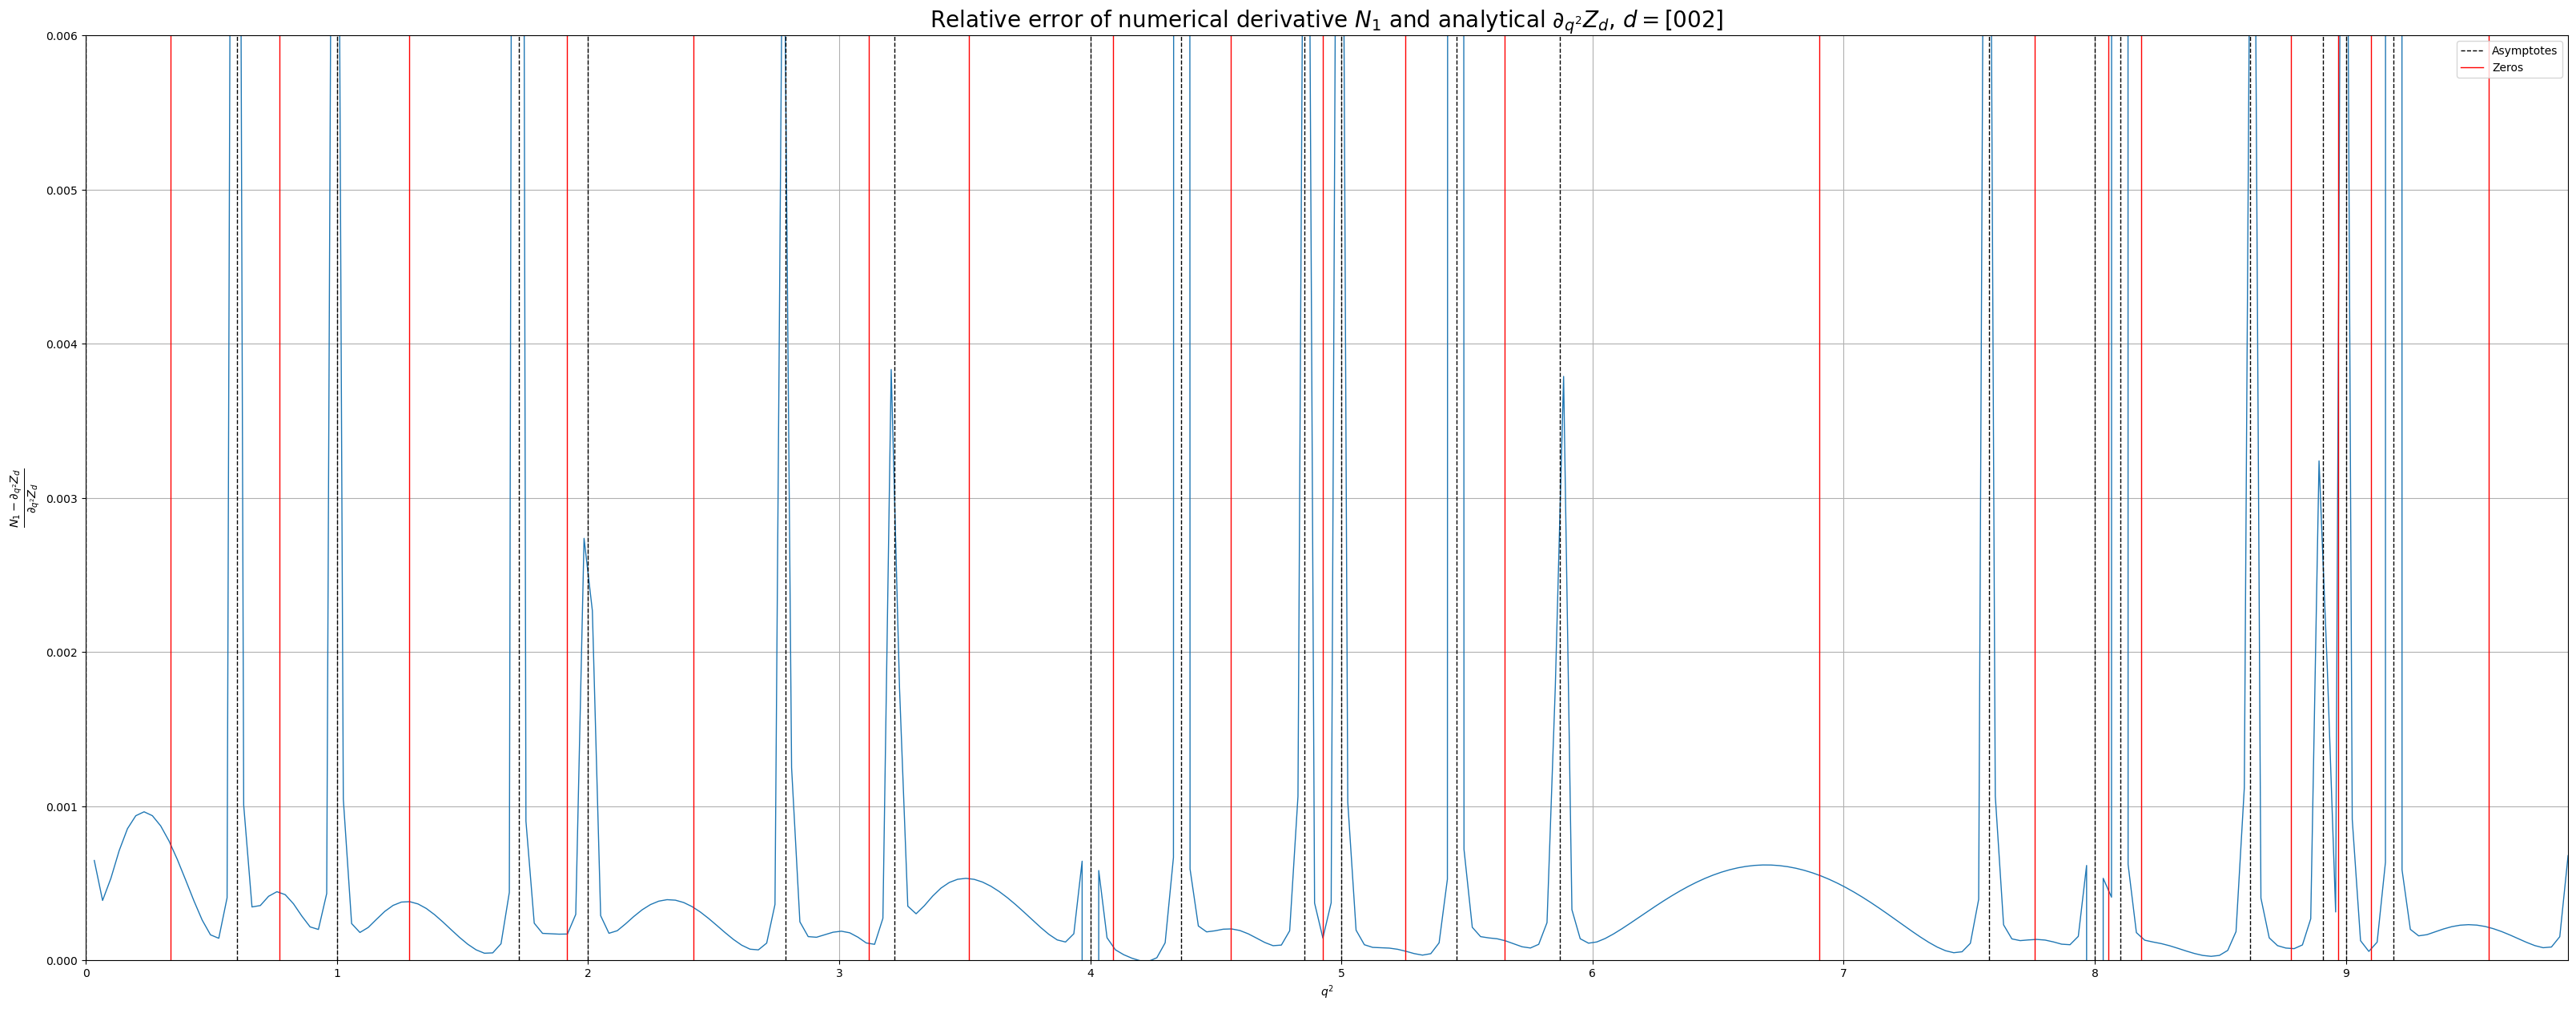

In [349]:
plt.figure(figsize = (40,15))

plot_nice(q_derivatives2, (dy_dx[::20] - accurate_deriv2)/accurate_deriv2, asymptotes, zeros, d_vec)

plt.ylim(0,0.006)

plt.xlim(0,q_derivatives2[-1])
plt.ylabel("$\\frac{N_1-\partial_{q^2}Z_d}{\partial_{q^2}Z_d}$", fontsize = 15)
plt.title("Relative error of numerical derivative $N_1$ and analytical $\partial_{{q^2}}Z_d$, $d = {}$".format(d_vec), fontsize = 20)

plt.show()


In [ ]:

KSS = np.vectorize(KSS)


def stability_analysis(d_vec = np.array([0,0,0]), alpha=0.01, resolution=6, ML = 4):

    directory = "roots_zeta/ML_{}/".format(ML)
    folder_name = "d_" + str(d_vec).replace(" ", "").replace("[", "").replace("]", "")
    data = np.load(directory+folder_name+"/data.npz")


    zeros_before = data["zeros"][0:6]
    asymptotes_before = data["asymptotes"]
    lower_asy = asymptotes_before[:-1]
    upper_asy = asymptotes_before[1:]

    d_sq = np.linalg.norm(d_vec)**2
    kappas = KSS(d_sq, alpha, zeros_before)

    #for meshgrid
    alpha_min = np.log10(alpha)-1/2
    alpha_max = np.log10(alpha)+1/2
    alphas = np.logspace( alpha_min,alpha_max, resolution)
    d1, d2, d3 = d_vec[0], d_vec[1], d_vec[2]


    ALPHA_TOTAL = np.zeros((len(zeros_before), resolution, resolution))
    CUTOFF_TOTAL = np.zeros((len(zeros_before), resolution, resolution))
    Z_TOTAL = np.zeros((len(zeros_before), resolution, resolution))



    for i in tqdm(range(len(zeros_before))):
        ot_mins = np.log10(kappas[i])-1
        ot_maxs = np.log10(kappas[i])+1
        cutoffs = np.logspace(ot_mins, ot_maxs, resolution)
        ALPHAS, CUTOFFS = np.meshgrid(alphas, cutoffs)
        Z = np.zeros_like(ALPHAS)
        
        for j in range(resolution):
            for k in range(resolution):
                Z[j,k] = np.abs(derivative(1, d_vec,zeros_before[i], ALPHAS[j,k], CUTOFFS[j,k] ))
        
        ALPHA_TOTAL[i] = ALPHAS
        CUTOFF_TOTAL[i] = CUTOFFS
        Z_TOTAL[i] = Z
        




    #fig, axs = plt.subplots(5, 4, figsize=(30, 25))
    fig, axs = plt.subplots(3, 2, figsize=(30, 25))
    # Iterate over the columns of all_roots
    for i in range(len(zeros_before)):
        # Calculate the row and column indices for the subplot
        row = i // 2
        col = i % 2
        
        alpha_min, alpha_max = np.log10(ALPHA_TOTAL[i].min()), np.log10(ALPHA_TOTAL[i].max())
        cutoff_min, cutoff_max = np.log10(CUTOFF_TOTAL[i].min()), np.log10(CUTOFF_TOTAL[i].max())
        extent = [alpha_min, alpha_max, cutoff_min, cutoff_max]
        # Plot each column in a separate subplot
        im = axs[row, col].imshow( (np.abs(Z_TOTAL[i])), aspect='auto', origin='lower', extent=extent, interpolation='none' )
        axs[row, col].set_xlabel('$\log_{10}\left(\\alpha\\right)$')
        axs[row, col].set_ylabel('$\log_{10}\left(\Xi^2\\right)$')
        axs[row, col].set_title('$U_{{{}}}$  = {:.3f}'.format(i+1,zeros_before[i]))
        axs[row, col].scatter(np.log10(alpha), np.log10(kappas[i]), c = "r", s = 100, marker = '+')  # Add red point
        fig.colorbar(im,ax=axs[row, col])
    # Add colorbar


    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    # Show the plot
    fig.suptitle(f'Deriv Stability for $\\vec d  = {{{d_vec}}}$ \n Results given as $\log_{{10}}\left( \left|{{U_i-U_i(\\alpha, \Xi^2)}}\\right|\\right)$ ', fontsize=20)





In [226]:


def stability_analysis(d_vec = np.array([0,0,0]), alpha=0.01, resolution=6, ML = 4):

    directory = "roots_zeta/ML_{}/".format(ML)
    folder_name = "d_" + str(d_vec).replace(" ", "").replace("[", "").replace("]", "")
    data = np.load(directory+folder_name+"/data.npz")

    zeros_before = data["zeros"][0:1]
    asymptotes_before = data["asymptotes"]
    lower_asy = asymptotes_before[:-1]
    upper_asy = asymptotes_before[1:]

    #zeros_before = np.array([0])
    d_sq = np.linalg.norm(d_vec)**2
    kappas = KSS(d_sq, alpha, zeros_before)

    #for meshgrid
    alpha_min = np.log10(alpha)-1
    alpha_max = np.log10(alpha)+1
    alphas = np.logspace( alpha_min,alpha_max, resolution)

    d1, d2, d3 = d_vec[0], d_vec[1], d_vec[2]


    ALPHA_TOTAL = np.zeros((len(zeros_before), resolution, resolution))
    CUTOFF_TOTAL = np.zeros((len(zeros_before), resolution, resolution))
    Z_TOTAL = np.zeros((len(zeros_before), resolution, resolution))

    #print(ALPHA_TOTAL)

    for i in tqdm(range(len(zeros_before))):
        x = zeros_before[i]
        d = np.linalg.norm(d_vec)
        m_tilde_sq = (ML/np.pi)**2
        beta = np.sqrt(d**2/(4*x+m_tilde_sq+d**2))
        gam = np.sqrt(1/(1-beta**2))
        ot_mins = np.log10(kappas[i])-1
        ot_maxs = np.log10(kappas[i])+1
        cutoffs = np.logspace(ot_mins, ot_maxs, resolution)


        cutoffs = np.logspace(1, 5, resolution)

        
        ALPHAS, CUTOFFS = np.meshgrid(alphas, cutoffs)

        #print(ALPHAS)

        Z = np.zeros_like(ALPHAS)
        
        for j in range(resolution):
            for k in range(resolution):

                #Z[j,k] = (g_ab_large(1,1, d_vec,zeros_before[i],  CUTOFFS[j,k], ALPHAS[j,k], ML))
                Z[j,k] = derivative(1, d_vec,zeros_before[i], ALPHAS[j,k], CUTOFFS[j,k] )
                #Z[j,k] = np.abs(derivative(1, d_vec,zeros_before[i], ALPHAS[j,k], CUTOFFS[j,k] ))
        
        ALPHA_TOTAL[i] = ALPHAS
        CUTOFF_TOTAL[i] = CUTOFFS
        Z_TOTAL[i] = Z
        reference = 0
        return Z_TOTAL, reference, ALPHA_TOTAL, CUTOFF_TOTAL, zeros_before, d_vec
    

def plot_stability(Z_TOTAL, reference, ALPHA_TOTAL, CUTOFF_TOTAL, zeros_before, d_vec):
    i = 0
    Z = Z_TOTAL[i]
    Z[Z<-1]= np.nan

    Z_TOTAL[i] = Z 

    
    plt.figure(figsize=(10, 10))

    
    i = 0
    alpha_min, alpha_max = np.log10(np.min(ALPHA_TOTAL[i])), np.log10(np.max(ALPHA_TOTAL[i]))

    cutoff_min, cutoff_max = np.log10(CUTOFF_TOTAL[i].min()), np.log10(CUTOFF_TOTAL[i].max())
    extent = [alpha_min, alpha_max, cutoff_min, cutoff_max]
    # Plot each column in a separate subplot
    im = plt.imshow( ((Z_TOTAL[i]- reference)), aspect='auto', origin='lower', extent=extent, interpolation='none' )
    plt.xlabel('$\log_{10}\left(\\alpha\\right)$')
    plt.ylabel('$\log_{10}\left(\Xi^2\\right)$')
    plt.title('$U_{{{}}}$  = {:.3f}'.format(i+1,zeros_before[i]))
    plt.colorbar(im)




In [227]:
d_vec = np.array([1,0,0])
alpha = 0.01
resolution = 10

args = stability_analysis(d_vec = np.array([1,0,0]), alpha=0.01, resolution=6, ML = 4)

  0%|          | 0/1 [02:33<?, ?it/s]


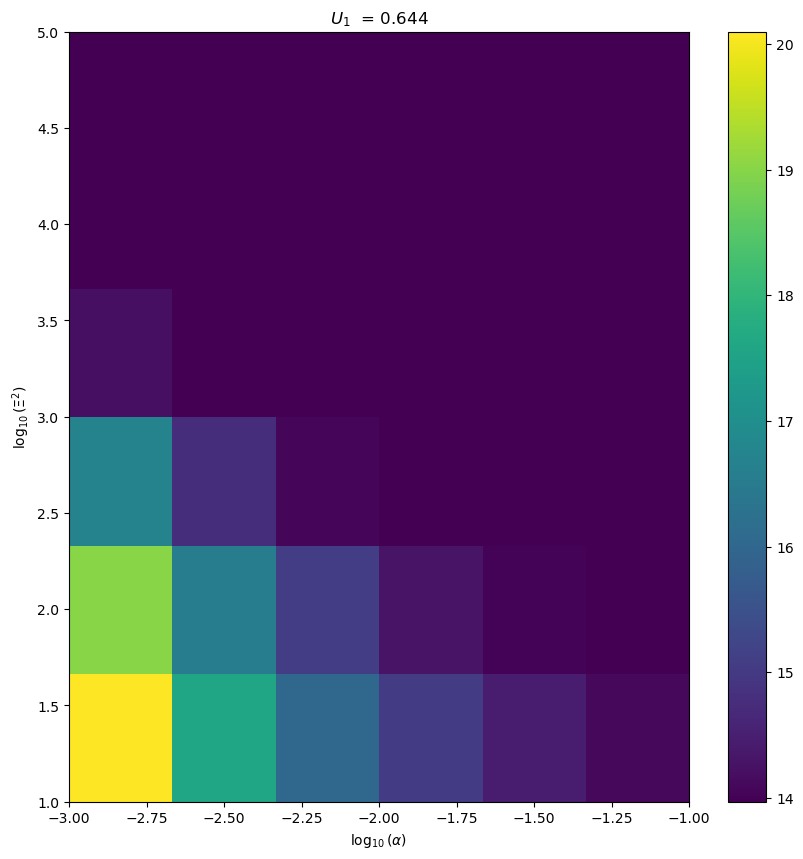

In [228]:

plot_stability(*args)


In [229]:
def plot_stability(Z_TOTAL, reference, ALPHA_TOTAL, CUTOFF_TOTAL, zeros_before, d_vec):
    i = 0

    Z_ref = ((Z_TOTAL[i]- reference)/reference)
    Z_ref[Z_ref<-0.1]= np.nan
    plt.figure(figsize=(10, 10))
    Z_ref = np.log10(-Z_TOTAL[i] +15)
    i = 0
    alpha_min, alpha_max = np.log10(np.min(ALPHA_TOTAL[i])), np.log10(np.max(ALPHA_TOTAL[i]))


    cutoff_min, cutoff_max = np.log10(CUTOFF_TOTAL[i].min()), np.log10(CUTOFF_TOTAL[i].max())
    extent = [alpha_min, alpha_max, cutoff_min, cutoff_max]
    # Plot each column in a separate subplot
    im = plt.imshow( Z_ref, aspect='auto', origin='lower', extent=extent, interpolation='none' )
    plt.xlabel('$\log_{10}\left(\\alpha\\right)$')
    plt.ylabel('$\log_{10}\left(\Xi^2\\right)$')
    plt.title('$U_{{{}}}$  = {:.3f}'.format(i+1,zeros_before[i]))
    plt.colorbar(im)


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_98292/3803773117.py:4: RuntimeWarning: divide by zero encountered in divide
  Z_ref = ((Z_TOTAL[i]- reference)/reference)
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_98292/3803773117.py:7: RuntimeWarning: invalid value encountered in log10
  Z_ref = np.log10(-Z_TOTAL[i] +15)


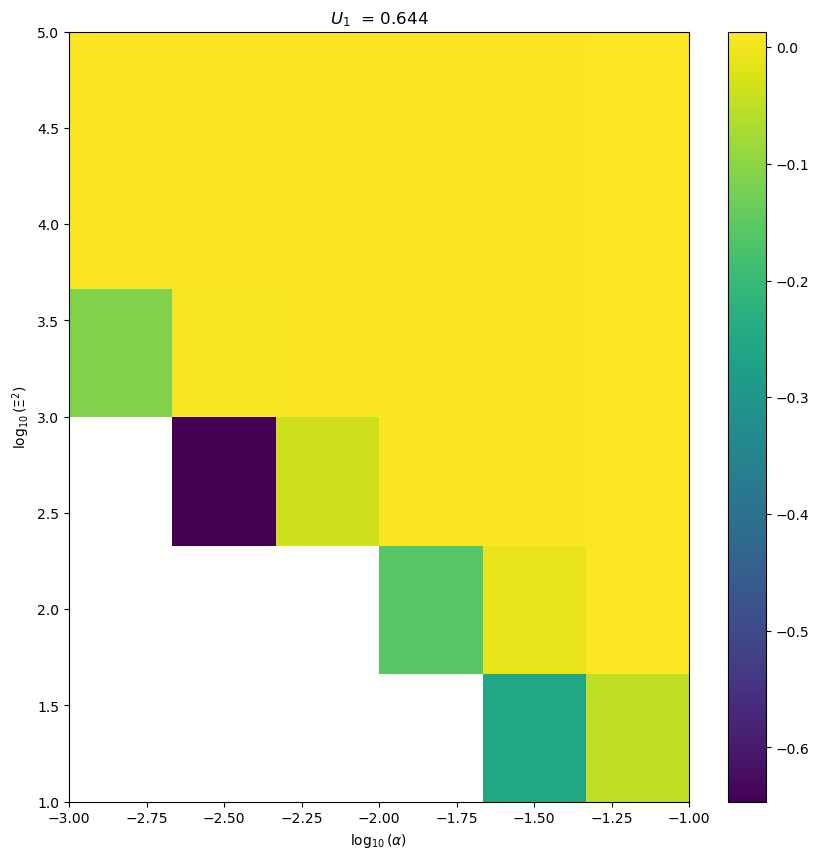

In [230]:
plot_stability(*args)

In [ ]:
def f(a,b,x,alpha):
    initial = (1/(2 * (3 + 2 * b))) * np.exp(x * alpha) * np.pi * (alpha**(-1/2 + a - b))
    part1 = (3 + 2*b - 2*x * alpha) * hyp1f1(3 + a, 1/2 + a - b, -x * alpha) / gam_f(1/2 + a - b) 
    part2 = x * alpha * hyp1f1(3 + a, 3/2 + a - b, -x * alpha) / gam_f(3/2 + a - b)
    result = initial * (part1 + part2) * (-1)**(a-b) 

[autoreload of derivative failed: Traceback (most recent call last):
  File "/Users/ericrechberger/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/ericrechberger/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/Users/ericrechberger/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MP

In [ ]:
def f(a,b,x,alpha):
    result = (1/(2 * (3 + 2 * b))) * np.exp(x * alpha) * np.pi * (alpha**(-1/2 + a - b))*((3 + 2*b - 2*x * alpha) * hyp1f1(3 + a, 1/2 + a - b, -x * alpha) / gam_f(1/2 + a - b)  + x * alpha * hyp1f1(3 + a, 3/2 + a - b, -x * alpha) / gam_f(3/2 + a - b)) * (-1)**(a-b) 
    return result

In [ ]:
f(1,1,0.1,0.01)

8.800303943249881

In [ ]:
import numpy as np
from scipy.special import hyp1f1

def Integral_a(a,x, alpha):
    term1 = (3 + 2*a - 2*x*alpha) * hyp1f1(3 + a, 1/2, -x*alpha)
    term2 = 2*x*alpha*(7 + 4*a - 2*x*alpha) * hyp1f1(3 + a, 3/2, -x*alpha)
    numerator = 2 * np.sqrt(alpha) * (term1 + term2)
    denominator = 3 + 2*a
    result = (np.exp(x*alpha) * np.sqrt(np.pi) * numerator) / (denominator * 4 * alpha)
    return result


In [ ]:
import numpy as np
from scipy.special import hyp1f1




In [ ]:
Integral_a(1,0.1,0.01)

8.835686878194066

In [ ]:
g_ab_large(1,0, np.array([1,0,0]), 0, 1e5, 0, 4)/np.sqrt(4*np.pi)



29.00524266009524

In [ ]:
g_ab_large(1,0, np.array([1,0,0]), 0, 1e6, 0, 4)/np.sqrt(4*np.pi)

29.015914480163826

In [ ]:
cutoffs = np.logspace(1, 5, 10)

y_vals = np.zeros_like(cutoffs)

for i in range(len(cutoffs)):
    y_vals[i] = g_ab_large(1,0, np.array([1,0,0]), 0, cutoffs[i], 0, 4)/np.sqrt(4*np.pi)




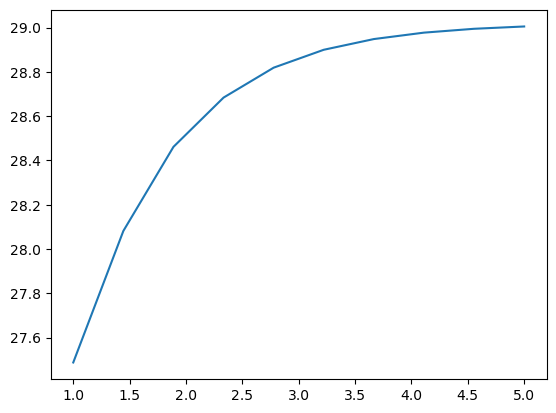

In [ ]:
cutoffs = np.logspace(1, 5, 10)

y_vals2 = np.zeros_like(cutoffs)

for i in range(len(cutoffs)):
    y_vals2[i] = g_ab_large(1,0, np.array([1,0,0]), 5, cutoffs[i], 0, 4)/np.sqrt(4*np.pi)



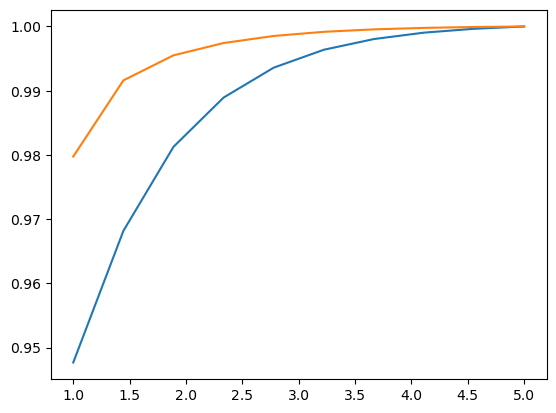

In [ ]:
plt.plot(np.log10(cutoffs), y_vals/y_vals[-1])
plt.plot(np.log10(cutoffs), y_vals2/y_vals2[-1])